In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Visualizations

### Univariate

<AxesSubplot:xlabel='species', ylabel='count'>

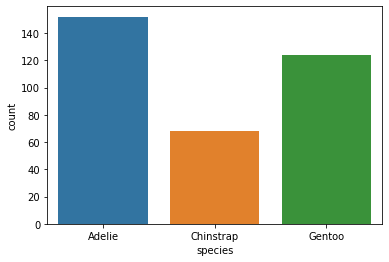

In [6]:
sns.countplot(x='species', data=df)

<AxesSubplot:xlabel='island', ylabel='count'>

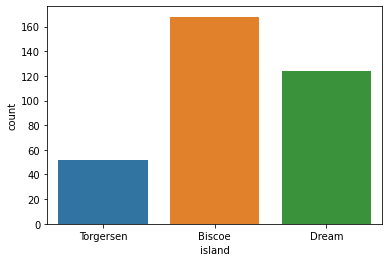

In [7]:
sns.countplot(x='island', data=df)

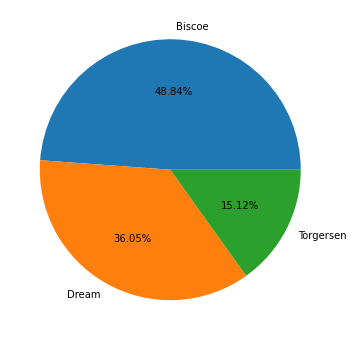

In [19]:
plt.figure(figsize=(6,6))
plt.pie(df['island'].value_counts(), autopct="%.2f%%", labels=df['island'].value_counts().index)
# plt.legend(df['island'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='Count'>

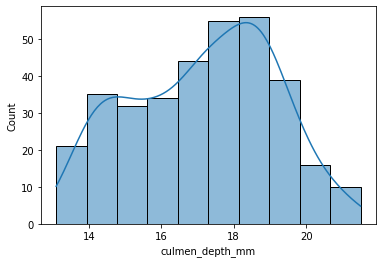

In [24]:
sns.histplot(x=df['culmen_depth_mm'], kde=True)

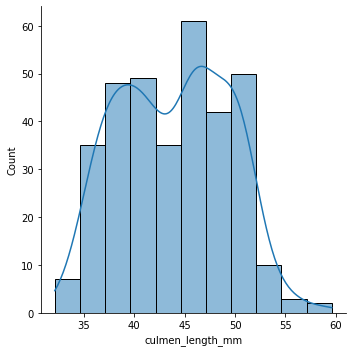

In [28]:
sns.displot(df['culmen_length_mm'], kde=True)

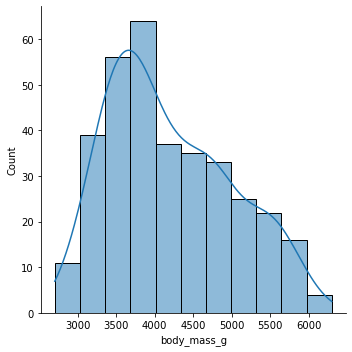

In [39]:
sns.displot(df['body_mass_g'], kde=True)

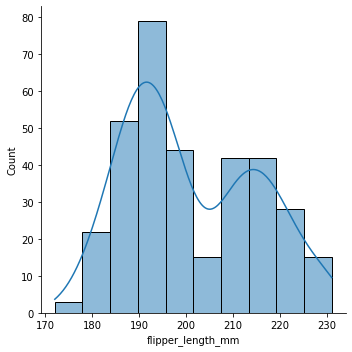

In [40]:
sns.displot(df['flipper_length_mm'], kde=True)

<AxesSubplot:xlabel='culmen_depth_mm'>

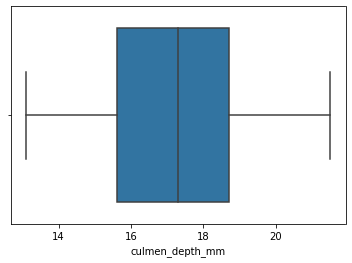

In [30]:
sns.boxplot(x=df['culmen_depth_mm'])

<AxesSubplot:xlabel='culmen_length_mm'>

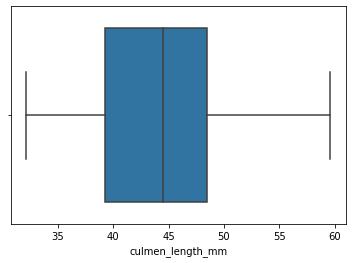

In [31]:
sns.boxplot(x=df['culmen_length_mm'])

<AxesSubplot:xlabel='body_mass_g'>

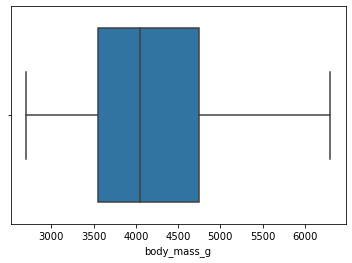

In [41]:
sns.boxplot(x=df['body_mass_g'])

<AxesSubplot:xlabel='flipper_length_mm'>

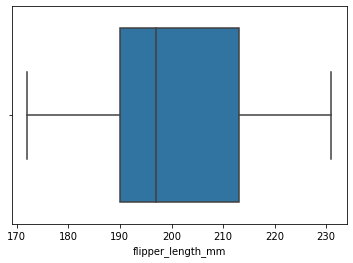

In [43]:
sns.boxplot(x=df['flipper_length_mm'])

### Bi-Variate

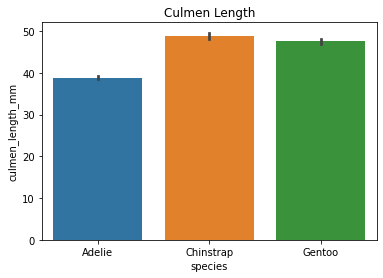

In [45]:
sns.barplot(y='culmen_length_mm', x='species', data=df)
plt.title('Culmen Length')
plt.show()

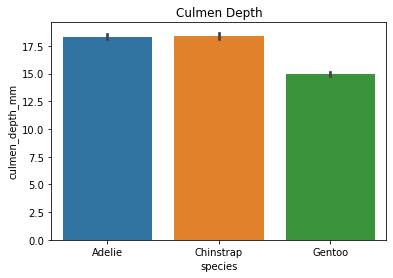

In [46]:
sns.barplot(x=df['species'], y=df['culmen_depth_mm'])
plt.title('Culmen Depth')
plt.show()

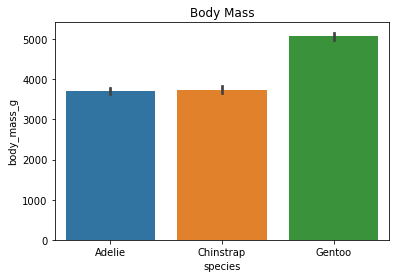

In [47]:
sns.barplot(x=df['species'], y=df['body_mass_g'])
plt.title('Body Mass')
plt.show()

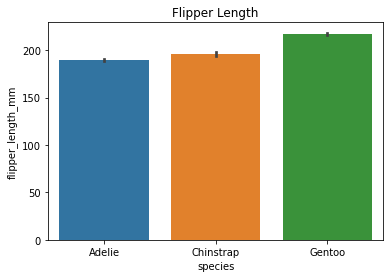

In [50]:
sns.barplot(x=df['species'], y=df['flipper_length_mm'])
plt.title('Flipper Length')
plt.show()

### Multivariate

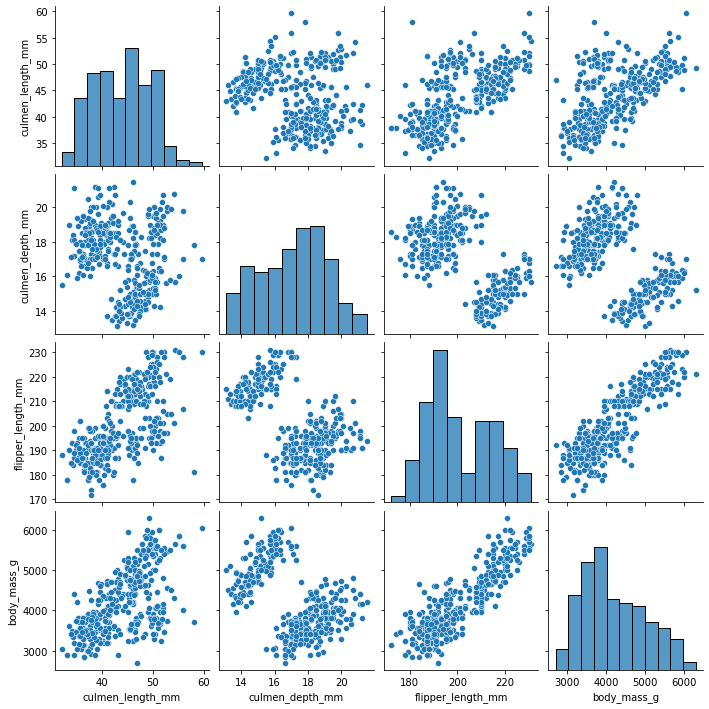

In [59]:
sns.pairplot(df)

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
df['target'] = df['species'].map({'Adelie':1, 'Chinstrap':2, 'Gentoo':3})

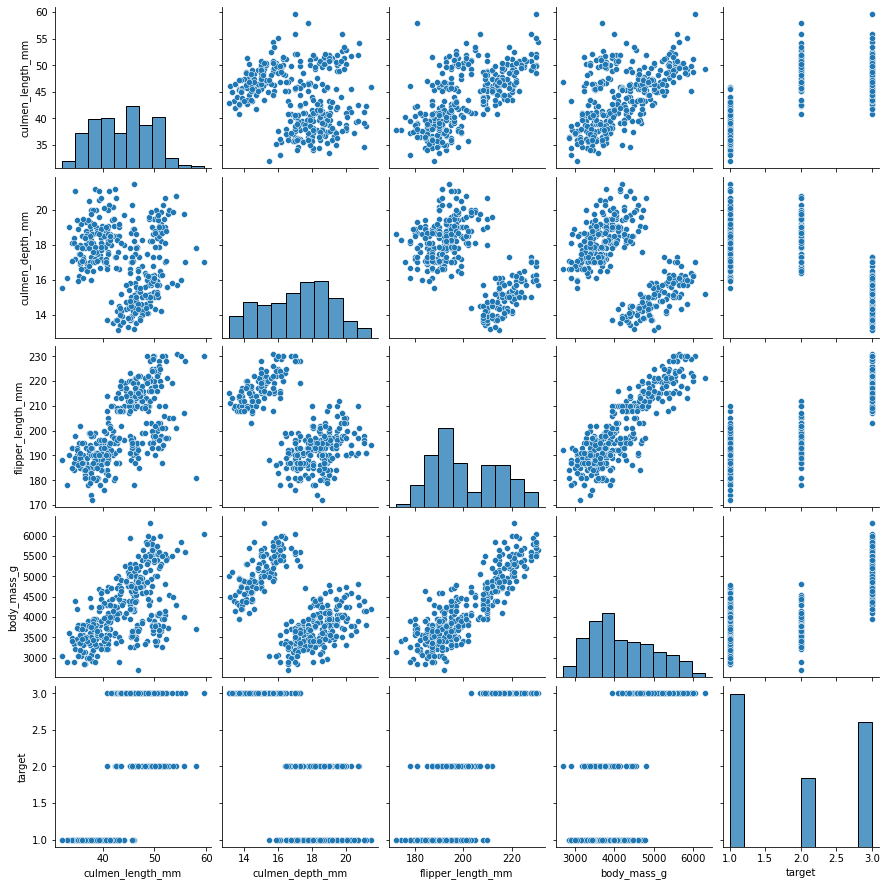

In [5]:
sns.pairplot(df)

<AxesSubplot:>

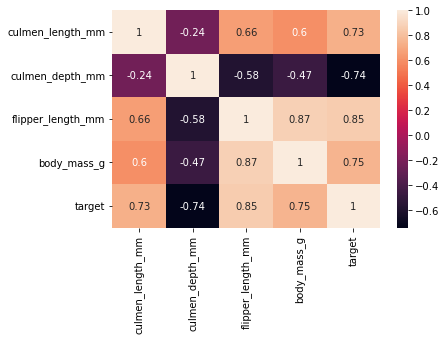

In [6]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

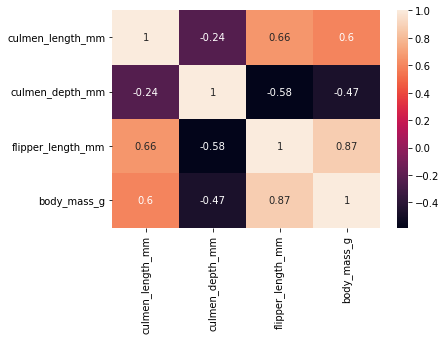

In [12]:
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)

### Descriptive Statistics

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,1.918605
std,5.459584,1.974793,14.061714,801.954536,0.893320
min,32.100000,13.100000,172.000000,2700.000000,1.000000
25%,39.225000,15.600000,190.000000,3550.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,2.000000
75%,48.500000,18.700000,213.000000,4750.000000,3.000000
max,59.600000,21.500000,231.000000,6300.000000,3.000000


### Missing Values

In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df['sex'].mode()[0]

'MALE'

In [14]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [16]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [19]:
df2 = pd.DataFrame(df2)

In [21]:
df['sex'] = np.where(df['sex'] == '.', df['sex'].mode()[0], df['sex'])

In [22]:
df['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [26]:
df.isna().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [29]:
na_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in na_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [30]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Outlier Handling

<AxesSubplot:xlabel='culmen_depth_mm'>

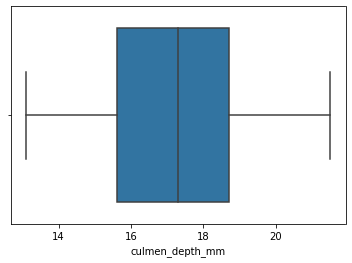

In [30]:
sns.boxplot(x=df['culmen_depth_mm'])

<AxesSubplot:xlabel='culmen_depth_mm'>

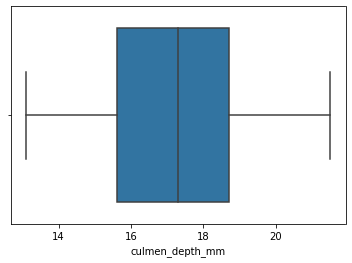

In [31]:
sns.boxplot(x=df['culmen_depth_mm'])

<AxesSubplot:xlabel='body_mass_g'>

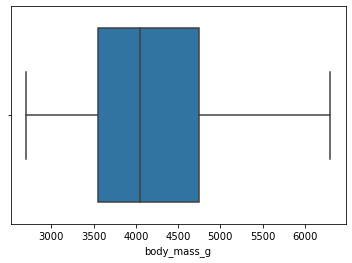

In [32]:
sns.boxplot(x=df['body_mass_g'])

<AxesSubplot:xlabel='flipper_length_mm'>

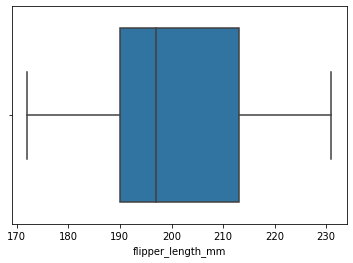

In [43]:
sns.boxplot(x=df['flipper_length_mm'])

**There are no outliers**

### Correlation

In [43]:
df['target'] = df['species'].map({'Adelie':1, 'Chinstrap':2, 'Gentoo':3})

In [51]:
df.corr()['target'].sort_values(ascending=False)

target               1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
culmen_depth_mm     -0.741282
Name: target, dtype: float64

### Encoding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   target             344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])

In [67]:
df = pd.get_dummies(data=df, columns=['island'], drop_first=True)

In [69]:
df2 = pd.get_dummies(data=df, columns=['species'])

In [73]:
df2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.10,18.7,181.0,3750.0,1,0,1,1,0,0
1,39.50,17.4,186.0,3800.0,0,0,1,1,0,0
2,40.30,18.0,195.0,3250.0,0,0,1,1,0,0
3,44.45,17.3,197.0,4050.0,1,0,1,1,0,0
4,36.70,19.3,193.0,3450.0,0,0,1,1,0,0


### Scaling the Data

In [74]:
X = df.drop('species', axis=1)
y = df['target']

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0,1.0
3,0.449091,0.500000,0.423729,0.375000,1.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0,1.0


### Split into Train and Test Data

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
X_train.shape

(240, 8)

In [83]:
y_train.shape

(240,)

In [84]:
X_test.shape

(104, 8)

In [85]:
y_test.shape

(104,)